In [ ]:
!pip install arviz -q #==0.6.1
!pip install Theano==1.0.5 -q
!pip install pymc3==3.9.3 -q

     |████████████████████████████████| 1.6MB 11.5MB/s 
     |████████████████████████████████| 4.7MB 67.0MB/s 
     |████████████████████████████████| 737kB 67.5MB/s 
     |████████████████████████████████| 317kB 49.6MB/s 
     |████████████████████████████████| 1.9MB 11.1MB/s 
     |████████████████████████████████| 102kB 7.2MB/s 


In [ ]:
import numpy as np
import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
import scipy.stats as stats
import arviz as az
import logging
logger = logging.getLogger("pymc3")
logger.propagate = False

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.9.3
Running on ArviZ v0.11.1


In [ ]:
# defining colors for the diferent entities
TCR_color = np.array([0.0, 0.6, 0.0])
CD45_color = np.array([1.0, 0.0, 0.0])
LCK_color = np.array([0.0, 0.0, 0.4])
aLCK_color = np.array([1.0, 0.6, 1.0])
pTCR_color = np.array([1.0, 0.6, 0.0])
membrane_color = 0.6*np.array([1.0, 1.0, 1.0])

In [ ]:
g11_data_array0 = np.array([[17.661,19.183,19.73,19.805,19.458,19.891,19.527,19.54,19.832,20.157,20.128],
[19.807,20.516,20.608,21.018,20.983,20.983,20.846,20.773,20.84,20.802,20.817],
[14.854,16.5,16.518,16.88,15.239,17.3,18.122,18.695,18.583,18.248,18.701],
[17.808,20.029,19.971,19.622,19.793,19.91,19.881,19.915,19.98,20.045,19.794],
[17.145,16.825,17.533,18.228,19.001,18.377,17.976,18.51,18.094,18.188,18.366],
[19.667,20.514,20.274,20.947,20.916,21.256,21.668,21.175,20.76,20.632,20.101],
[18.68,18.576,18.716,19.04,19.282,19.41,19.602,19.408,19.639,19.461,19.855],
[16.496,18.266,18.58,18.612,18.559,19.555,19.953,20.253,20.713,20.557,20.536],
[17.674,18.396,18.03,18.118,17.606,17.807,18.07,17.928,17.594,17.25,17.308],
[19.08,19.262,18.823,18.762,17.688,16.945,17.339,18.742,18.945,19.308,19.242],
[15.556,17.646,16.964,16.932,17.065,16.846,17.816,16.883,17.014,17.24,17.83],
[18.485,19.306,19.624,19.605,19.746,19.579,20.574,20.42,20.268,20.555,20.235],
[15.822,18.493,18.293,18.172,17.955,17.996,18.483,19.479,19.548,19.265,19.335],
[18.794,19.639,19.373,19.302,18.612,19.361,19.757,19.137,19.559,17.867,18.11],
[19.544,19.512,19.452,19.359,19.638,19.804,19.639,19.734,19.606,19.516,19.298],
[18.865,18.723,18.375,17.985,19.549,19.418,19.875,18.889,18.312,18.905,19.247],
[17.74,19.186,19.218,19.565,19.492,19.574,19.547,19.58,19.534,19.937,20.119],
[18.161,18.791,18.908,19.036,19.124,19.352,19.251,19.114,18.099,17.437,17.8],
[17.938,19.659,19.598,19.619,19.361,19.318,18.931,18.962,18.84,18.572,18.795],
[19.298,20.702,20.232,18.734,18.933,18.68,20.009,20.906,19.983,21.698,21.396]])

g22_data_array0 = np.array([[40.041,52.171,51.35,29.385,29.899,26.539,24.747,25.122,25.862,24.263,23.395],
[40.704,65.18,16.491,21.928,17.19,19.452,19.197,17.847,19.484,21.011,21.138],
[39.042,42.095,16.474,16.675,14.722,13.55,17.955,18.605,18.349,18.939,19.479],
[38.419,47.203,14.739,12.982,12.733,15.255,13.751,16.323,17.894,17.449,19.414],
[39.108,53.466,12.586,12,12.753,14.967,15.872,15.312,17.068,16.613,14.618],
[38.113,45.535,20.098,12.111,11.407,13.368,13.442,13.216,13.973,17.431,15.352],
[39.648,50.23,19.223,12.787,13.078,15.23,13.828,13.692,12.99,12.969,13.974],
[38.017,50.687,17.7,12.634,15.672,13.763,14.569,13.574,15.226,13.608,14.524],
[36.345,69.927,19.105,11.132,11.422,11.372,12.303,11.948,12.753,14.639,14.842],
[40.794,61.187,28.937,13.248,13.526,12.374,12.695,13.368,13.863,11.607,14.586],
[40.921,55.434,15.722,12.631,11.345,11.369,12.609,12.635,12.586,13.711,12.415],
[38.929,56.889,18.765,11.926,11.054,12.053,11.273,11.119,12.761,13.477,13.677],
[39.473,50.729,21.278,12.516,12.972,12.526,12.54,11.717,11.926,13.661,12.903],
[38.131,35.466,11.213,9.67,11.095,10.651,10.628,10.119,12.048,11.376,12.653],
[39.627,53.418,21.563,9.6493,11.463,10.294,10.446,11.087,11.837,11.89,12.081],
[38.691,56.514,13.84,10.841,10.191,10.97,10.824,11.493,11.993,10.927,12.072],
[38.369,63.582,19.472,12.247,12.861,10.001,11.511,11.678,10.888,11.904,10.845],
[38.179,68.412,17.91,11.824,12.56,13.241,10.941,10.486,10.073,10.858,10.58],
[37.695,58.418,21.777,21.935,11.346,10.919,11.021,12.221,11.51,10.89,11.082],
[39.867,56.521,29.038,14.488,12.373,10.574,11.135,10.364,9.2701,10.909,10.99]])

g12_data_array0 = np.array([[21.443,2.146,1.8681,3.8138,3.9293,5.6677,5.3346,4.3738,4.2115,5.28,8.2552],
[24.357,5.1339,6.7392,8.223,9.3518,10.359,11.295,10.972,12.868,13.388,13.722],
[20.173,5.2959,7.333,7.8585,10.086,11.09,11.441,12.287,12.422,13.599,14.602],
[21.048,6.5607,8.4275,10.31,11.318,12.677,13.688,14.361,14.064,14.734,15.726],
[25.645,5.9201,9.4306,10.969,12.123,12.807,13.398,14.336,14.965,15.327,16.625],
[21.139,7.0034,9.7752,10.405,11.668,12.448,13.244,15.181,15.767,16.214,18.283],
[21.274,6.9867,9.6211,11.519,13.453,14.475,15.672,17.101,17.715,18.632,19.162],
[23.961,8.0956,10.543,11.696,13.353,14.386,15.99,17.091,18.055,18.893,19.542],
[22.423,8.268,10.87,11.669,13.451,15.054,16.721,17.912,18.917,19.362,19.769],
[27.017,7.3613,10.131,12.155,13.812,15.167,16.219,16.971,18.294,18.95,19.332],
[20.636,8.0815,10.922,12.998,14.427,15.393,16.38,17.264,17.915,19.277,20.381],
[19.696,9.7434,12.274,13.932,15.715,17.327,18.2,19.712,20.157,21.347,22.44],
[22.62,8.7923,11.49,12.903,14.329,15.736,16.811,17.696,18.532,19.141,20.687],
[21.159,8.8581,10.963,13.294,14.779,16.134,17.312,18.822,19.915,21.127,22.049],
[23.141,7.6794,10.896,12.606,14.96,16.412,17.242,17.534,19.21,20.28,20.491],
[24.11,7.9982,10.606,11.875,13.188,14.998,16.305,17.323,18.873,20.375,20.659],
[25.384,7.243,10.881,13.414,15.346,16.97,18.282,18.986,20.141,21.525,22.371],
[21.893,8.3062,11.252,12.743,14.472,16.041,17.768,19.057,20.07,20.825,21.393],
[23.24,7.2108,10.11,12.491,14.012,16.15,17.421,18.109,19.321,20.581,22.27],
[23.722,9.4973,11.47,13.331,15.163,17.049,17.551,18.817,20.326,20.695,22.219]])

t0 = 0 #2;
k0 = 0;

w_TCR_array = 20*g11_data_array0[k0:,t0:]
w_CD45_array = 20*g22_data_array0[k0:,t0:]
dep_array = 10*g12_data_array0[k0:,t0:]

In [ ]:
# np.save("w_TCR_evidence_nm", w_TCR_array)
# np.save("w_CD45_evidence_nm", w_CD45_array)
# np.save("dep_evidence_nm", dep_array)


# from google.colab import files
# files.download("w_TCR_evidence_nm.npy") # Download locally from colab
# files.download("w_CD45_evidence_nm.npy")
# files.download("dep_evidence_nm.npy") 


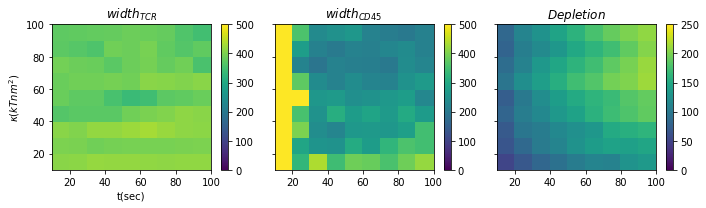

In [ ]:
t = np.linspace(0, 100, 11)
k = np.linspace(5, 100, 20)

# select indices
selekted_t_inds = np.arange(1,11,1)
selekted_k_inds = np.arange(1,20,2)

st = t[selekted_t_inds]
sk = k[selekted_k_inds]

w_TCR_array1 = w_TCR_array[selekted_k_inds,:]
w_TCR_array2 = w_TCR_array1[:,selekted_t_inds]

w_CD45_array1 = w_CD45_array[selekted_k_inds,:]
w_CD45_array2 = w_CD45_array1[:,selekted_t_inds]

dep_array1 = dep_array[selekted_k_inds,:]
dep_array2 = dep_array1[:,selekted_t_inds]

[t_array, k_array] = np.meshgrid(t[t0:],k[k0:])
[st_array, sk_array] = np.meshgrid(st,sk)

fig, ax1=plt.subplots(1,3, figsize=[10,3],sharey=True)

vmin0 = 0
vmax0 = 500
im0 = ax1[0].pcolor(st ,sk, w_TCR_array2, vmin=vmin0, vmax=vmax0)
# ax1[0].contour(st ,sk, w_TCR_array2, vmin=vmin0, vmax=vmax0, colors='w')
fig.colorbar(im0, ax=ax1[0])
ax1[0].set_title("$width_{TCR}$")
ax1[0].set_xlabel("t(sec)")
ax1[0].set_ylabel("$\kappa(kTnm^2)$")

vmin1 = 0
vmax1 = 500
im1 = ax1[1].pcolor(st ,sk, w_CD45_array2, vmin=vmin1, vmax=vmax1)
# ax1[1].contour(st ,sk, w_CD45_array2, vmin=vmin1, vmax=vmax1, colors='w')
fig.colorbar(im1, ax=ax1[1])
ax1[1].set_title('$width_{CD45}$')

vmin2 = 0
vmax2 = 250
im2 = ax1[2].pcolor(st ,sk, dep_array2, vmin=vmin2, vmax=vmax2)
# ax1[2].contour(st ,sk, dep_array2, vmin=vmin2, vmax=vmax2, colors='w')
fig.colorbar(im2, ax=ax1[2])
ax1[2].set_title('$Depletion$')

plt.tight_layout()

#### Build untrained model

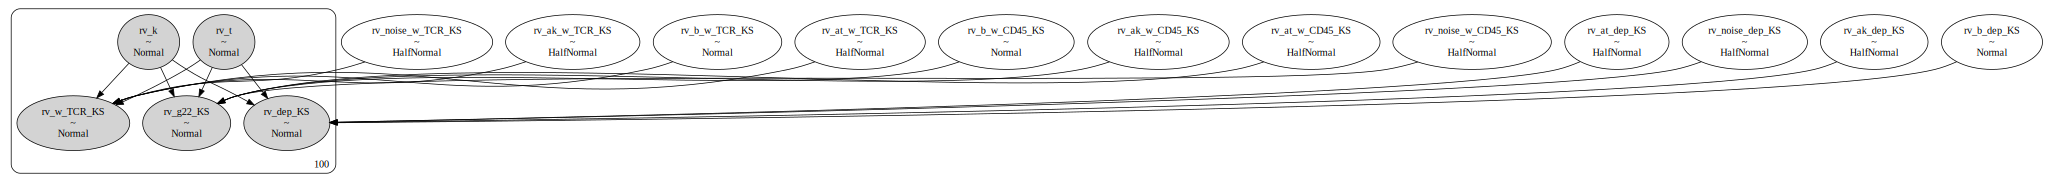

In [ ]:
def get_model1_untrained(t_array, k_array, 
    w_TCR_array, w_CD45_array, dep_array): #dm_CD45_KS_obs
    '''
    TODO: add proper documentation

    '''
    model1 = pm.Model()
    with model1:
        ### model1 - KS (kinetic segregation) ###########################    
        
        t_input = st_array.reshape(-1)
        k_input = sk_array.reshape(-1)
        # rv_t = pm.Uniform('rv_t', 0, 100, observed=t_input)
        # rv_k = pm.Uniform('rv_k', 0, 100, observed=k_input)
        rv_t = pm.Normal('rv_t', mu=70, sd=30, observed=t_input)
        rv_k = pm.Normal('rv_k', mu=50, sd=20, observed=k_input)

        # w_TCR_KS ####################################################
        w_TCR_KS_obs = w_TCR_array2.reshape(-1)
        
        rv_at_w_TCR_KS = pm.HalfNormal('rv_at_w_TCR_KS', sd=1) # surface t slope
        rv_ak_w_TCR_KS = pm.HalfNormal('rv_ak_w_TCR_KS', sd=1) # surface k slope
        rv_b_w_TCR_KS = pm.Normal('rv_b_w_TCR_KS', mu=500, sd=100) # surface intercept
        rv_noise_w_TCR_KS = pm.HalfNormal('rv_noise_w_TCR_KS', sd=50) # noise 
        
        rv_w_TCR_KS = pm.Normal('rv_w_TCR_KS', mu=rv_b_w_TCR_KS +\
                                    rv_at_w_TCR_KS*rv_t + rv_ak_w_TCR_KS*rv_k, \
                                    sd=rv_noise_w_TCR_KS, observed=w_TCR_KS_obs) #

        #################################################################
        # w_CD45_KS ####################################################
        w_CD45_KS_obs = w_CD45_array2.reshape(-1)
        
        rv_at_w_CD45_KS = pm.HalfNormal('rv_at_w_CD45_KS', sd=1) # surface t slope
        rv_ak_w_CD45_KS = pm.HalfNormal('rv_ak_w_CD45_KS', sd=1) # surface k slope
        rv_b_w_CD45_KS = pm.Normal('rv_b_w_CD45_KS', mu=500, sd=100) # surface intercept
        rv_noise_w_CD45_KS = pm.HalfNormal('rv_noise_w_CD45_KS', sd=50) # noise 
        
        rv_w_CD45_KS = pm.Normal('rv_g22_KS', mu=rv_b_w_CD45_KS +\
                                    rv_at_w_CD45_KS*rv_t + rv_ak_w_CD45_KS*rv_k, \
                                    sd=rv_noise_w_CD45_KS, observed=w_CD45_KS_obs) #

        #################################################################
        # dep_KS ####################################################
        dep_KS_obs = dep_array2.reshape(-1)
        
        rv_at_dep_KS = pm.HalfNormal('rv_at_dep_KS', sd=1) # surface t slope
        rv_ak_dep_KS = pm.HalfNormal('rv_ak_dep_KS', sd=1) # surface k slope
        rv_b_dep_KS = pm.Normal('rv_b_dep_KS', mu=500, sd=100) # surface intercept
        rv_noise_dep_KS = pm.HalfNormal('rv_noise_dep_KS', sd=50) # noise 
        
        rv_dep_KS = pm.Normal('rv_dep_KS', mu=rv_b_dep_KS +\
                                    rv_at_dep_KS*rv_t + rv_ak_dep_KS*rv_k, \
                                    sd=rv_noise_dep_KS, observed=dep_KS_obs) #

        #################################################################
    return model1

model1= get_model1_untrained(t_array, k_array, 
    w_TCR_array, w_CD45_array, dep_array) #dm_CD45_KS_obs
gv1 = pm.model_to_graphviz(model1)
gv1   

In [ ]:
with model1:
    trace1 = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_noise_dep_KS, rv_b_dep_KS, rv_ak_dep_KS, rv_at_dep_KS, rv_noise_w_CD45_KS, rv_b_w_CD45_KS, rv_ak_w_CD45_KS, rv_at_w_CD45_KS, rv_noise_w_TCR_KS, rv_b_w_TCR_KS, rv_ak_w_TCR_KS, rv_at_w_TCR_KS]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 75 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


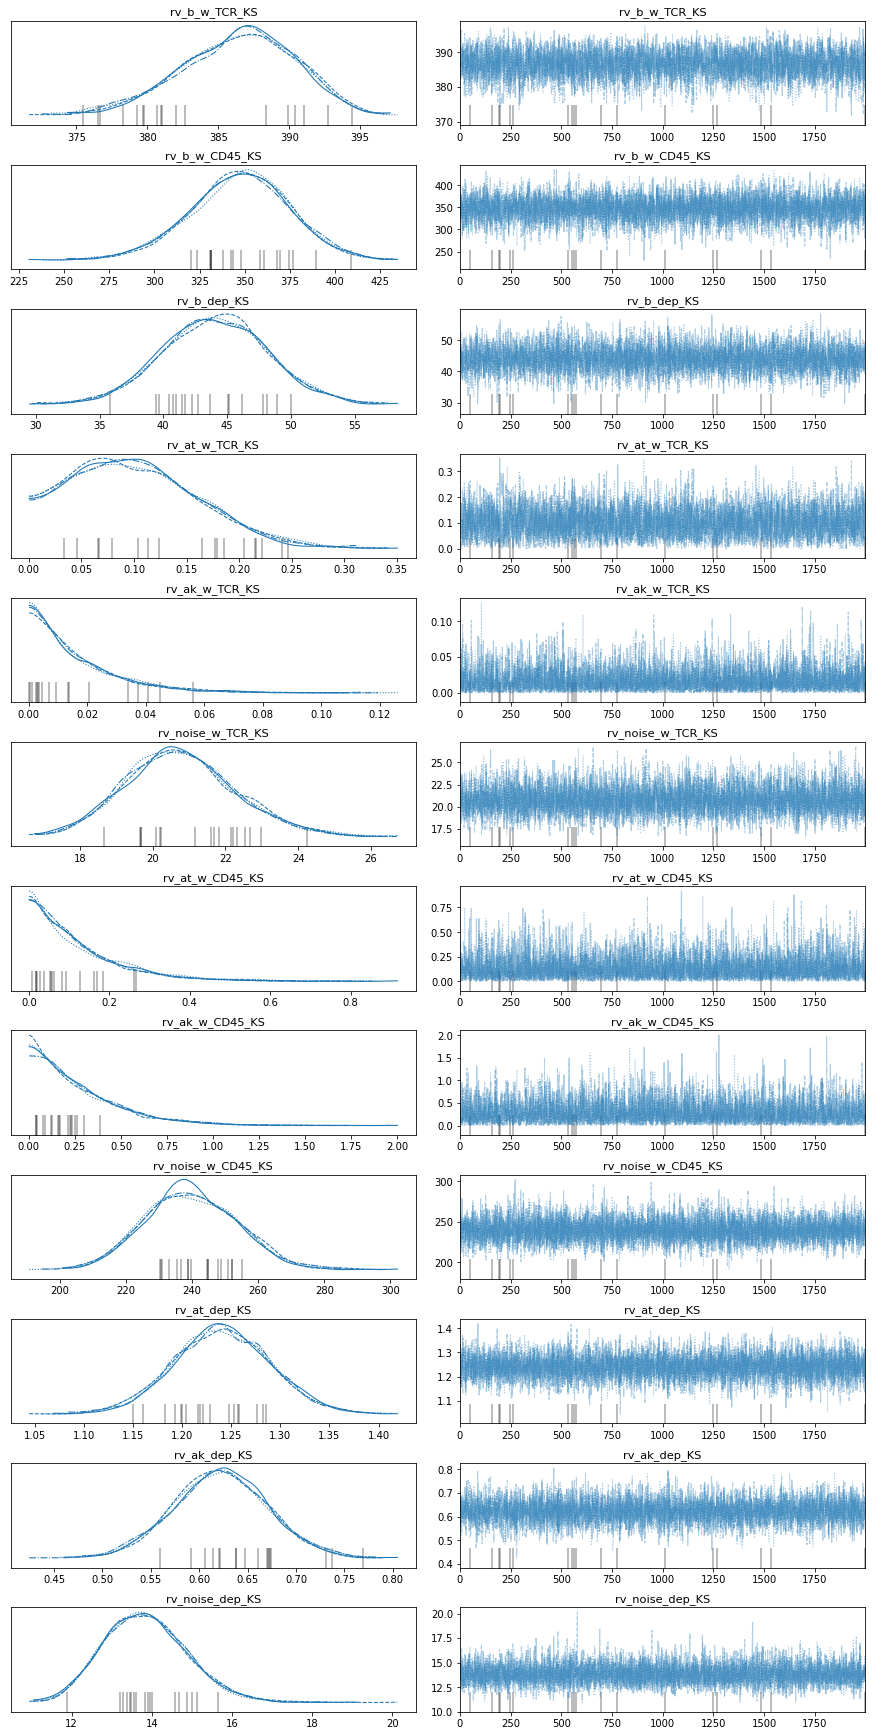

In [ ]:
pm.traceplot(trace1);

In [ ]:
pm.summary(trace1).round(3) # var_names=["mu", "tau"]

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
rv_b_w_TCR_KS,386.360,4.043,378.757,393.722,0.077,0.055,2749.0,2749.0,2892.0,2034.0,1.0
rv_b_w_CD45_KS,347.252,27.409,291.672,395.994,0.371,0.262,5465.0,5465.0,5524.0,4443.0,1.0
rv_b_dep_KS,44.085,4.107,36.122,51.604,0.057,0.041,5137.0,5035.0,5138.0,4409.0,1.0
rv_at_w_TCR_KS,0.102,0.060,0.000,0.201,0.001,0.001,2896.0,2537.0,2845.0,2855.0,1.0
rv_ak_w_TCR_KS,0.016,0.016,0.000,0.045,0.000,0.000,6394.0,5988.0,5002.0,3428.0,1.0
rv_noise_w_TCR_KS,20.782,1.529,17.998,23.733,0.019,0.014,6359.0,6251.0,6489.0,4515.0,1.0
rv_at_w_CD45_KS,0.124,0.118,0.000,0.338,0.001,0.001,6715.0,6627.0,4739.0,3224.0,1.0
rv_ak_w_CD45_KS,0.270,0.243,0.000,0.715,0.003,0.002,5530.0,5530.0,4103.0,3008.0,1.0
rv_noise_w_CD45_KS,239.808,14.057,213.268,264.742,0.167,0.119,7114.0,6994.0,7228.0,4947.0,1.0
rv_at_dep_KS,1.240,0.049,1.149,1.333,0.001,0.000,6183.0,6183.0,6172.0,4589.0,1.0


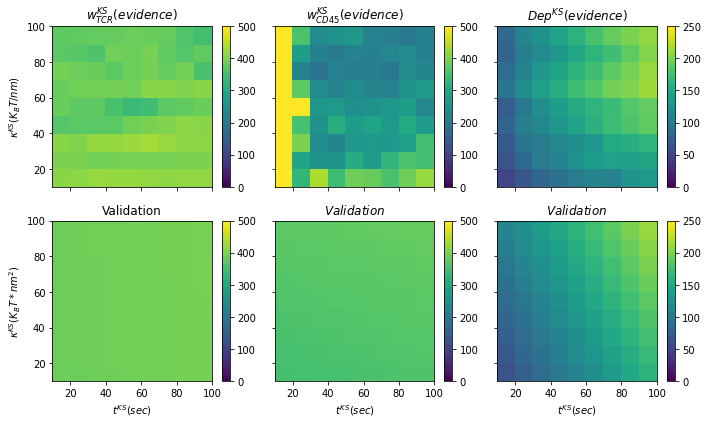

In [ ]:
rv_at_w_TCR_KS_mean = trace1.rv_at_w_TCR_KS.mean()
rv_ak_w_TCR_KS_mean = trace1.rv_ak_w_TCR_KS.mean()
rv_b_w_TCR_KS_mean = trace1.rv_b_w_TCR_KS.mean()
rv_noise_w_TCR_KS_mean = trace1.rv_noise_w_TCR_KS.mean()

rv_at_w_CD45_KS_mean = trace1.rv_at_w_CD45_KS.mean()
rv_ak_w_CD45_KS_mean = trace1.rv_ak_w_CD45_KS.mean()
rv_b_w_CD45_KS_mean = trace1.rv_b_w_CD45_KS.mean()
rv_noise_w_CD45_KS_mean = trace1.rv_noise_w_CD45_KS.mean()

rv_at_dep_KS_mean = trace1.rv_at_dep_KS.mean()
rv_ak_dep_KS_mean = trace1.rv_ak_dep_KS.mean()
rv_b_dep_KS_mean = trace1.rv_b_dep_KS.mean()
rv_noise_dep_KS_mean = trace1.rv_noise_dep_KS.mean()

w_TCR_KS_post = rv_b_w_TCR_KS_mean +\
                  rv_at_w_TCR_KS_mean*st_array +\
                  rv_ak_w_TCR_KS_mean*sk_array

w_CD45_KS_post = rv_b_w_CD45_KS_mean +\
                  rv_at_w_CD45_KS_mean*st_array +\
                  rv_ak_w_CD45_KS_mean*sk_array

dep_KS_post = rv_b_dep_KS_mean +\
                  rv_at_dep_KS_mean*st_array +\
                  rv_ak_dep_KS_mean*sk_array

### plot #######################################################################
fig, ax0 = plt.subplots(2,3, figsize=[10, 6], sharex=True, sharey=True)

vmin11 = 0; vmax11 = 500
im1 = ax0[0,0].pcolor(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11)
# ax0[0,0].contour(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im1, ax=ax0[0,0])
ax0[0,0].set_title('$w_{TCR}^{KS} (evidence)$')
# ax0[0,0].set_xlabel('$t^{KS}(sec)$')
ax0[0,0].set_ylabel('$\kappa^{KS}(K_BT/nm)$')

im4 = ax0[1,0].pcolor(st, sk, w_TCR_KS_post, vmin=vmin11, vmax=vmax11)
# ax0[1,0].contour(t_array, k_array, w_TCR_KS_post, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im4, ax=ax0[1,0])
ax0[1,0].set_title('Validation')
ax0[1,0].set_xlabel('$t^{KS}(sec)$')
ax0[1,0].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

##########################################################
vmin22 = 0; vmax22 = 500
im2 = ax0[0,1].pcolor(st, sk, w_CD45_array2, vmin=vmin22, vmax=vmax22)
# ax0[0,1].contour(t_array, k_array, w_CD45_array, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im1, ax=ax0[0,1])
ax0[0,1].set_title('$w_{CD45}^{KS} (evidence)$')
# ax0[0,1].set_xlabel('$t^{KS}(sec)$')
# ax0[0,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im5 = ax0[1,1].pcolor(st, sk, w_CD45_KS_post, vmin=vmin22, vmax=vmax22)
# ax0[1,1].contour(st, sk, w_CD45_KS_post, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im4, ax=ax0[1,1])
ax0[1,1].set_title('$Validation$')
ax0[1,1].set_xlabel('$t^{KS}(sec)$')
# ax0[1,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

##########################################################
vmin12 = 0; vmax12 = 250
im3 = ax0[0,2].pcolor(st, sk, dep_array2, vmin=vmin12, vmax=vmax12)
# ax0[0,2].contour(st, sk, dep_array, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im3, ax=ax0[0,2]) # cbarlabel="nm]"
ax0[0,2].set_title('$Dep^{KS} (evidence)$')
# ax0[0,2].set_xlabel('$t^{KS}(sec)$')
# ax0[0,2].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im6 = ax0[1,2].pcolor(st, sk, dep_KS_post, vmin=vmin12, vmax=vmax12)
# ax0[1,2].contour(st, sk, dep_KS_post, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im6, ax=ax0[1,2])
ax0[1,2].set_title('$Validation$')
ax0[1,2].set_xlabel('$t^{KS}(sec)$')
# ax0[1,2].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

plt.tight_layout();                  

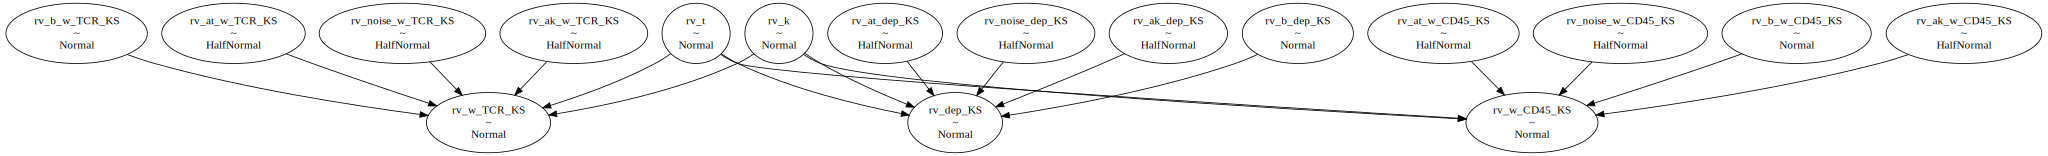

In [ ]:
def get_model1_trained(trace1, observed_t= None, observed_k= None):
    ''' return model1 trained based on trace1. 
    If observed_t and/or observed_k are specified, 
    return the model conditioned on those values '''
    model1_trained = pm.Model()
    with model1_trained:
        ### model1 - KS (kinetic segregation) ###########################    
        #  #####################################################
        
        rv_t = pm.Normal('rv_t', mu=70, sd=30, observed= observed_t)
        rv_k = pm.Normal('rv_k', mu=50, sd=20, observed= observed_k)

        # dw_TCR_KS ####################################################
        
        w_TCR_KS_obs = w_TCR_array.reshape(-1)
        rv_at_w_TCR_KS = pm.HalfNormal('rv_at_w_TCR_KS',
                                         sd= trace1.rv_at_w_TCR_KS.mean()) # surface t slope
        rv_ak_w_TCR_KS = pm.HalfNormal('rv_ak_w_TCR_KS', 
                                         sd= trace1.rv_ak_w_TCR_KS.mean()) # surface k slope
        rv_b_w_TCR_KS = pm.Normal('rv_b_w_TCR_KS', 
                                    mu= trace1.rv_b_w_TCR_KS.mean(), 
                                    sd= trace1.rv_b_w_TCR_KS.std()) # surface intercept
        rv_noise_w_TCR_KS = pm.HalfNormal('rv_noise_w_TCR_KS', 
                                            sd= trace1.rv_noise_w_TCR_KS.std()) # noise 
        
        rv_w_TCR_KS = pm.Normal('rv_w_TCR_KS',
                                  mu=rv_b_w_TCR_KS +\
                                  rv_at_w_TCR_KS*rv_t + rv_ak_w_TCR_KS*rv_k,
                                  sd=rv_noise_w_TCR_KS) #

        ##############################################################
        # w_CD45_KS ####################################################
        
        w_CD45_KS_obs = w_CD45_array.reshape(-1)
        rv_at_w_CD45_KS = pm.HalfNormal('rv_at_w_CD45_KS',
                                         sd= trace1.rv_at_w_CD45_KS.mean()) # surface t slope
        rv_ak_w_CD45_KS = pm.HalfNormal('rv_ak_w_CD45_KS', 
                                         sd= trace1.rv_ak_w_CD45_KS.mean()) # surface k slope
        rv_b_w_CD45_KS = pm.Normal('rv_b_w_CD45_KS', 
                                    mu= trace1.rv_b_w_CD45_KS.mean(), 
                                    sd= trace1.rv_b_w_CD45_KS.std()) # surface intercept
        rv_noise_w_CD45_KS = pm.HalfNormal('rv_noise_w_CD45_KS', 
                                            sd= trace1.rv_noise_w_CD45_KS.std()) # noise 
        
        rv_w_CD45_KS = pm.Normal('rv_w_CD45_KS',
                                  mu=rv_b_w_CD45_KS +\
                                  rv_at_w_CD45_KS*rv_t + rv_ak_w_CD45_KS*rv_k,
                                  sd=rv_noise_w_CD45_KS) #

        ##############################################################
        # g12_KS ####################################################
        
        dep_KS_obs = dep_array.reshape(-1)
        rv_at_dep_KS = pm.HalfNormal('rv_at_dep_KS',
                                         sd= trace1.rv_at_dep_KS.mean()) # surface t slope
        rv_ak_dep_KS = pm.HalfNormal('rv_ak_dep_KS', 
                                         sd= trace1.rv_ak_dep_KS.mean()) # surface k slope
        rv_b_dep_KS = pm.Normal('rv_b_dep_KS', 
                                    mu= trace1.rv_b_dep_KS.mean(), 
                                    sd= trace1.rv_b_dep_KS.std()) # surface intercept
        rv_noise_dep_KS = pm.HalfNormal('rv_noise_dep_KS', 
                                            sd= trace1.rv_noise_dep_KS.std()) # noise 
        
        rv_dep_KS = pm.Normal('rv_dep_KS',
                                  mu=rv_b_dep_KS +\
                                  rv_at_dep_KS*rv_t + rv_ak_dep_KS*rv_k,
                                  sd=rv_noise_dep_KS) #

        ##############################################################

    return model1_trained

model1_trained= get_model1_trained(trace1)
gv1 = pm.model_to_graphviz(model1_trained)
display(gv1)

In [ ]:
n_t = 10 #11
n_k = 10 #11
Ts = np.linspace(10,100, n_t)
Ks = np.linspace(10,100, n_k)
w_TCRs_mean = np.zeros((n_k, n_t))
w_TCRs_std = np.zeros((n_k, n_t))
w_CD45s_mean = np.zeros((n_k, n_t))
w_CD45s_std = np.zeros((n_k, n_t))
deps_mean = np.zeros((n_k, n_t))
deps_std = np.zeros((n_k, n_t))

# logger = logging.getLogger("pymc3")
# logger.propagate = False
for i,k in enumerate(Ks):
    for j,t in enumerate(Ts):
        cur_model= get_model1_trained(trace1, observed_k= k, observed_t= t)
        with cur_model:
            cur_trace = pm.sample(1000, chains=2, progressbar = False);
        print(f"i,t={i,t}, j,k={j,k}")
        w_TCRs_mean[i,j] = cur_trace.rv_w_TCR_KS.mean() 
        w_TCRs_std[i,j] = cur_trace.rv_w_TCR_KS.std();
        w_CD45s_mean[i,j] = cur_trace.rv_w_CD45_KS.mean() 
        w_CD45s_std[i,j] = cur_trace.rv_w_CD45_KS.std();
        deps_mean[i,j] = cur_trace.rv_dep_KS.mean() 
        deps_std[i,j] = cur_trace.rv_dep_KS.std();

# save:


In [ ]:
np.save("trained_w_TCR_KS_mean_10x10", w_TCRs_mean)
np.save("trained_w_TCR_KS_std_10x10", w_TCRs_std)
np.save("trained_w_CD45_KS_mean_10x10", w_CD45s_mean)
np.save("trained_w_CD45_KS_std_10x10", w_CD45s_std)
np.save("trained_dep_KS_mean_10x10", deps_mean)
np.save("trained_dep_KS_std_10x10", deps_std)
# !ls

In [ ]:
!ls

sample_data			  trained_w_CD45_KS_std_10x10.npy
trained_dep_KS_mean_10x10.npy	  trained_w_TCR_KS_mean_10x10.npy
trained_dep_KS_std_10x10.npy	  trained_w_TCR_KS_std_10x10.npy
trained_w_CD45_KS_mean_10x10.npy


In [ ]:
from google.colab import files
files.download("trained_w_TCR_KS_mean_10x10.npy") # Download locally from colab
files.download("trained_w_TCR_KS_std_10x10.npy")
files.download("trained_w_CD45_KS_mean_10x10.npy") 
files.download("trained_w_CD45_KS_std_10x10.npy") 
files.download("trained_dep_KS_mean_10x10.npy") 
files.download("trained_dep_KS_std_10x10.npy") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

plot trained heatmaps:

Text(0, 0.5, '$\\kappa^{KS}(K_BT*nm^2)$')

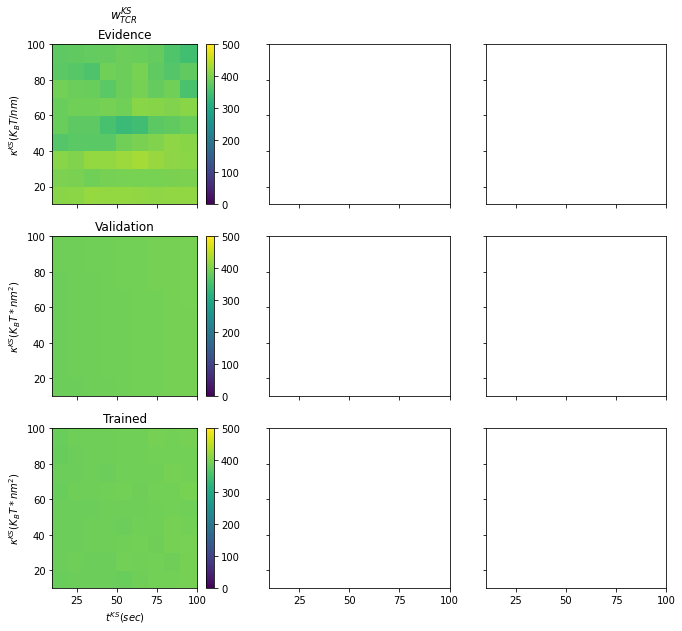

In [ ]:
fig, ax1 = plt.subplots(3,3, figsize=[11, 10], sharex=True, sharey=True)

vmin11 = 0; vmax11 = 500
im1 = ax1[0,0].pcolor(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11)
# ax1[0,0].contour(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im1, ax=ax1[0,0])
ax1[0,0].set_title("$w_{TCR}^{KS}$ \nEvidence")
# ax1[0,0].set_xlabel("$t^{KS}(sec)$")
ax1[0,0].set_ylabel("$\kappa^{KS}(K_BT/nm)$")

im4 = ax1[1,0].pcolor(st, st, w_TCR_KS_post, vmin=vmin11, vmax=vmax11)
# ax1[1,0].contour(st, st, w_TCR_KS_post, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im4, ax=ax1[1,0])
ax1[1,0].set_title("Validation")
# ax1[1,0].set_xlabel("$t^{KS}(sec)$")
ax1[1,0].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

im7 = ax1[2,0].pcolor(Ts, Ks, w_TCRs_mean, vmin=vmin11, vmax=vmax11)
# ax1[2,0].contour(Ts, Ks, w_TCR_KS_mean, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im4, ax=ax1[2,0])
ax1[2,0].set_title("Trained")
ax1[2,0].set_xlabel("$t^{KS}(sec)$")
ax1[2,0].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

NameError: ignored

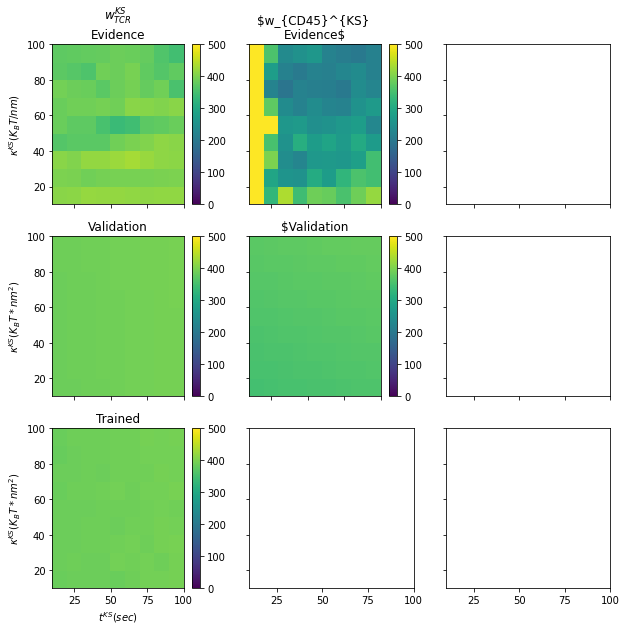

In [ ]:
trainedw_TCR_KS_mean = np.load('trained_w_TCR_KS_mean_10x10.npy')
trainedw_CD45_KS_mean = np.load('trained_w_CD45_KS_mean_10x10.npy')
traineddep_KS_mean = np.load('trained_dep_KS_mean_10x10.npy')

fig, ax1 = plt.subplots(3,3, figsize=[10, 10], sharex=True, sharey=True)
"""
fig = plt.figure()
# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
plt.plot([1, 2, 3], [1, 2, 3])
# Adds a subplot at the 4th position
fig.add_subplot(2, 2, 4)
plt.plot([3, 2, 1], [1, 2, 3])
"""
vmin11 = 0; vmax11 = 500
im1 = ax1[0,0].pcolor(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11)
# ax1[0,0].contour(st, sk, w_TCR_array2, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im1, ax=ax1[0,0])
ax1[0,0].set_title("$w_{TCR}^{KS}$ \nEvidence")
# ax1[0,0].set_xlabel("$t^{KS}(sec)$")
ax1[0,0].set_ylabel("$\kappa^{KS}(K_BT/nm)$")

im4 = ax1[1,0].pcolor(st, st, w_TCR_KS_post, vmin=vmin11, vmax=vmax11)
# ax1[1,0].contour(st, st, w_TCR_KS_post, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im4, ax=ax1[1,0])
ax1[1,0].set_title("Validation")
# ax1[1,0].set_xlabel("$t^{KS}(sec)$")
ax1[1,0].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

im7 = ax1[2,0].pcolor(Ts, Ks, w_TCRs_mean, vmin=vmin11, vmax=vmax11)
# ax1[2,0].contour(Ts, Ks, w_TCR_KS_mean, vmin=vmin11, vmax=vmax11, colors='w')
fig.colorbar(im4, ax=ax1[2,0])
ax1[2,0].set_title("Trained")
ax1[2,0].set_xlabel("$t^{KS}(sec)$")
ax1[2,0].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

##########################################################
vmin22 = 0; vmax22 = 500
im2 = ax1[0,1].pcolor(st, sk, w_CD45_array2, vmin=vmin22, vmax=vmax22)
# ax1[0,1].contour(st, sk, w_CD45_array2, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im1, ax=ax1[0,1])
ax1[0,1].set_title('$w_{CD45}^{KS} \nEvidence$')
# ax1[0,1].set_xlabel('$t^{KS}(sec)$')
# ax1[0,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')


im5 = ax1[1,1].pcolor(st, sk, w_CD45_KS_post, vmin=vmin22, vmax=vmax22)
# ax1[1,1].contour(st, sk, w_CD45_KS_post, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im4, ax=ax1[1,1])
ax1[1,1].set_title("$Validation")
# ax1[1,1].set_xlabel('$t^{KS}(sec)$')
# ax1[1,1].set_ylabel('$\kappa^{KS}(K_BT*nm^2)$')

im8 = ax1[2,1].pcolor(Ts, Ks, dw_CD45_KS_mean, vmin=vmin22, vmax=vmax22)
# ax1[2,1].contour(Ts, Ks, w_CD45_KS_mean, vmin=vmin22, vmax=vmax22, colors='w')
fig.colorbar(im4, ax=ax1[2,1])
ax1[2,1].set_title("$Trained")
ax1[2,1].set_xlabel("$t^{KS}(sec)$")
# ax1[2,1].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

##########################################################
vmin12 = 0; vmax12 = 250
im3 = ax1[0,2].pcolor(st, sk, dep_array2, vmin=vmin12, vmax=vmax12)
# ax0[0,2].contour(st, sk, dep_array2, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im3, ax=ax1[0,2]) # cbarlabel="nm]"
ax1[0,2].set_title("$Depletion^{KS} \nEvidence$")
# ax1[0,2].set_xlabel("$t^{KS}(sec)$")
# ax1[0,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")


im6 = ax1[1,2].pcolor(st, sk, dep_KS_post, vmin=vmin12, vmax=vmax12)
# ax1[1,2].contour(st, sk, dep_KS_post, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im6, ax=ax1[1,2])
ax1[1,2].set_title("$Validation")
# ax1[1,2].set_xlabel("$t^{KS}(sec)$")
# ax1[1,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

im9 = ax1[2,2].pcolor(Ts, Ks, dep_KS_mean, vmin=vmin12, vmax=vmax12)
# ax1[2,2].contour(Ts, Ks, dep_KS_mean, vmin=vmin12, vmax=vmax12, colors='w')
fig.colorbar(im6, ax=ax1[2,2])
ax1[2,2].set_title("$Trained")
ax1[2,2].set_xlabel("$t^{KS}(sec)$")
# ax1[2,2].set_ylabel("$\kappa^{KS}(K_BT*nm^2)$")

plt.tight_layout();                  